Configure workspace  select the appropriate Azure ML environment
It is necessary if create anew environmnet
Also  it will authenticate the note book to use  the workspace resource

In [ ]:
import azureml.core

print("This notebook was created using version 1.0.57 of the Azure ML SDK")
print("You are currently using version", azureml.core.VERSION, "of the Azure ML SDK")

In [6]:
import os

subscription_id = os.getenv("SUBSCRIPTION_ID", default="4a99ad0b-5a1c-46f4-bea8-e81845b5a94e")
resource_group = os.getenv("RESOURCE_GROUP", default="bszmlworkshop")
workspace_name = os.getenv("WORKSPACE_NAME", default="bszmldemo")
workspace_region = os.getenv("WORKSPACE_REGION", default="northeurope")

In [8]:
#write the workspace config file   and authenticate if necessary
from azureml.core import Workspace

try:
    ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
    # write the details of the workspace to a configuration file to the notebook library
    ws.write_config()
    print("Workspace configuration succeeded. Skip the workspace creation steps below")
except:
    print("Workspace not accessible. Change your parameters or create a new workspace below")

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code F5CJUCBW8 to authenticate.
Interactive authentication successfully completed.
Workspace configuration succeeded. Skip the workspace creation steps below


In [9]:
##  list local dir just to know where i am
for name in os.listdir(os.getcwd()):
    print(name)

churn1-experiment.ipynb
churn2-experiment.ipynb
README.md
opeldata.csv
.azureml
clv2.ipynb
opelAnalyze.ipynb


In [10]:
#read back the   workspace config
from azureml.core import Workspace
ws = Workspace.from_config()

# Choose a name for the experiment and specify the project folder.
experiment_name = 'automl-classification'
project_folder = './sample_projects/automl-classification'

experiment = Experiment(ws, experiment_name)

output = {}
output['SDK version'] = azureml.core.VERSION
output['Subscription ID'] = ws.subscription_id
output['Workspace Name'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
outputDf = pd.DataFrame(data = output, index = [''])
outputDf.T

,
SDK version,1.0.57
Subscription ID,4a99ad0b-5a1c-46f4-bea8-e81845b5a94e
Workspace Name,bszmldemo
Resource Group,bszmlworkshop
Location,northeurope
Project Directory,./sample_projects/automl-classification
Experiment Name,automl-classification


In [11]:
from azureml.core import Workspace
ws = Workspace.from_config()

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [12]:
import logging

from matplotlib import pyplot as plt
import pandas as pd
import os

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.core.dataset import Dataset
from azureml.train.automl import AutoMLConfig

W0905 18:21:19.741211 139938113029888 deprecation_wrapper.py:119] From /anaconda/envs/azureml_py36/lib/python3.6/site-packages/azureml/automl/core/_vendor/automl/client/core/common/tf_wrappers.py:36: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0905 18:21:19.742493 139938113029888 deprecation_wrapper.py:119] From /anaconda/envs/azureml_py36/lib/python3.6/site-packages/azureml/automl/core/_vendor/automl/client/core/common/tf_wrappers.py:36: The name tf.logging.ERROR is deprecated. Please use tf.compat.v1.logging.ERROR instead.



In [7]:
pwd

'/mnt/azmnt/code/Users'

In [10]:
# choose a name for experiment
experiment_name = 'automl-comparision-curn-clv'
# project folder
project_folder = './mnt/azmnt/code/Users/WA_Fn-UseC_-Telco-Customer-Churn'

In [13]:
experiment=Experiment(ws, experiment_name)

output = {}
output['SDK version'] = azureml.core.VERSION
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
outputDf = pd.DataFrame(data = output, index = [''])
outputDf.T

,
SDK version,1.0.57
Subscription ID,c66c342f-a989-4745-8c62-9ab2480be04e
Workspace,test_env2
Resource Group,churn_clv_training
Location,westeurope
Project Directory,./mnt/azmnt/code/Users/WA_Fn-UseC_-Telco-Customer-Churn
Experiment Name,automl-comparision-curn-clv


In [14]:
# Create or Attach existing AmlCompute
from azureml.core.compute import AmlCompute
from azureml.core.compute import ComputeTarget

# Choose a name for your cluster.
amlcompute_cluster_name = "curn-clv"

found = False
# Check if this compute target already exists in the workspace.
cts = ws.compute_targets
if amlcompute_cluster_name in cts and cts[amlcompute_cluster_name].type == 'AmlCompute':
    found = True
    print('Found existing compute target.')
    compute_target = cts[amlcompute_cluster_name]
    
if not found:
    print('Creating a new compute target...')
    provisioning_config = AmlCompute.provisioning_configuration(vm_size = "STANDARD_D2_V2", # for GPU, use "STANDARD_NC6"
                                                                #vm_priority = 'lowpriority', # optional
                                                                max_nodes = 6)

    # Create the cluster.
    compute_target = ComputeTarget.create(ws, amlcompute_cluster_name, provisioning_config)
    
print('Checking cluster status...')
# Can poll for a minimum number of nodes and for a specific timeout.
# If no min_node_count is provided, it will use the scale settings for the cluster.
compute_target.wait_for_completion(show_output = True, min_node_count = None, timeout_in_minutes = 20)

# For a more detailed view of current AmlCompute status, use get_status().

Creating a new compute target...
Checking cluster status...
Creating
Succeeded
AmlCompute wait for completion finished
Minimum number of nodes requested have been provisioned


In [15]:
#data
if not os.path.isdir('data'):
    os.mkdir('data')
    
if not os.path.exists(project_folder):
    os.makedirs(project_folder)

In [16]:
from azureml.core.runconfig import RunConfiguration
from azureml.core.conda_dependencies import CondaDependencies
import pkg_resources

# create a new RunConfig object
conda_run_config = RunConfiguration(framework="python")

# Set compute target to AmlCompute
conda_run_config.target = compute_target
conda_run_config.environment.docker.enabled = True

cd = CondaDependencies.create(conda_packages=['numpy','py-xgboost<=0.80'])
conda_run_config.environment.python.conda_dependencies = cd

In [17]:
dataset = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [18]:
# basic analyis  of inpt data
dataset.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5795-KTGUD,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [19]:
#data type conversion  "cleans"  after read  csv
dataset['TotalCharges']=dataset['TotalCharges'].convert_objects(convert_numeric=True)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [20]:
# fill empty spaces with the mean of the neighbours
dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean(), inplace=True)

In [ ]:
#  dataset corellation analysis
dataset.corr()

In [22]:
df=dataset.copy()

In [23]:
unwantedcolumnlist=["customerID","TotalCharges"]

In [24]:
#  remove the unwanted column
df = df.drop(unwantedcolumnlist, axis=1)

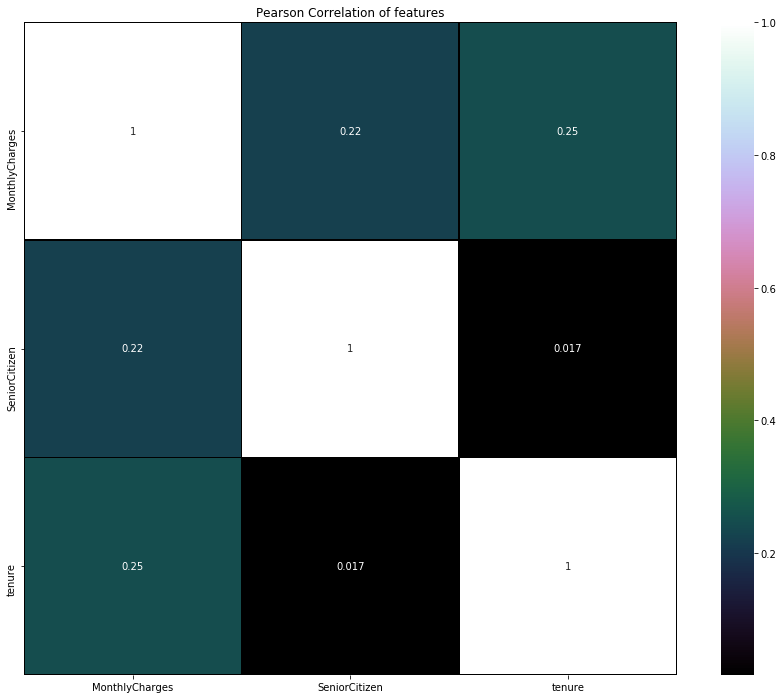

In [25]:
# calculate corellation between  different variables  if 2 variabless  highly cirellated   near 1  then use only one of them ~.7  looks corellated
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
df_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [26]:
#create sample data
data_dummy=pd.get_dummies(df,drop_first=True)

In [27]:
len(data_dummy.columns)

30

In [28]:
data_dummy.head(5)

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [29]:

X = data_dummy.iloc[:, 0:29].values
y = data_dummy.iloc[:, 29].values   # target datset  it contains only the target  in this case is the column 29

In [30]:
# split the data to training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  

In [31]:
#  standardization tha data insight 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
!pip install xgboost

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
#  XBOOST   algorithm - kind of decision tree  with more performance faster to train
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [33]:
# another decision tree  use different way of classificaton  
from sklearn  import ensemble
adaboost =ensemble.AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [34]:
# Gradient boosted classifier  algorithm
from sklearn  import ensemble
gboost =ensemble.GradientBoostingClassifier()
gboost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [35]:
# Fit the SVM  algorithm
from sklearn.svm import SVC
svc_cl = SVC(kernel = 'rbf', random_state = 0)
svc_cl.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
# SGD algorithmm to train
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
##  Logistic regression
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train, y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
# random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
# KNN  classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# Naiv bayes   mode
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
# skylearm model accuracy analyzing and model selecting module
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
# usig cross validataion metod based on kfold algorithm
# estimator is based on which algorithm is evaluating
#  first analyze with the  train data
# after it analyse  with test data  X=X_test y=y_test
acc_xgb = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_xgb.mean()
acc_adb = cross_val_score(estimator = adaboost, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_adb.mean()


acc_gbbost = cross_val_score(estimator = gboost, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gbbost.mean()

acc_dec1 = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_dec1.mean()

acc_gaussion1 = cross_val_score(estimator = gaussian, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gaussion1.mean()

acc_knn1 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_knn1.mean()

acc_random1 = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_random1.mean()

acc_log_reg1 = cross_val_score(estimator = logistic_reg, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_log_reg1.mean()

acc_sgd1 = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_sgd1.mean()

acc_svc1 = cross_val_score(estimator = svc_cl, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_svc1.mean()

0.7953346855983774

In [53]:
##  text just descriptions  oragnyzing the   above values  into dataframe to make user readable.
models_cross = pd.DataFrame({
    'Model': ['XBOOST','AdaBoost','GradientBoosting','Support Vector Machines','Stochastic Gradient Decent','Logistic Regression', 
              'Random Forest','Decision Tree', 'Guassian Naive Bayes', 'Kneighbours'],
    'Score': [acc_xgb.mean(), acc_adb.mean(),acc_gbbost.mean(),acc_svc1.mean(),acc_sgd1.mean(), acc_log_reg1.mean(), 
              acc_random1.mean(),acc_dec1.mean(), acc_gaussion1.mean(), acc_knn1.mean()]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score
0,XBOOST,0.80
1,AdaBoost,0.80
5,Logistic Regression,0.80
2,GradientBoosting,0.80
3,Support Vector Machines,0.80
6,Random Forest,0.77
4,Stochastic Gradient Decent,0.75
9,Kneighbours,0.74
7,Decision Tree,0.72
8,Guassian Naive Bayes,0.67
